In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
customers_df = pd.read_csv('../data/Customers.csv')
products_df = pd.read_csv('../data/Products.csv')
transactions_df = pd.read_csv('../data/Transactions.csv')

In [3]:
# Display the first few rows of each dataset to understand the structure and content
print('Customer data:\n', customers_df.head())
print('\nProduct data:\n',products_df.head())
print('\nTransaction data:\n',transactions_df.head())

Customer data:
   CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Product data:
   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transaction data:
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127 

In [4]:
# Missing values
missing_customers = customers_df.isnull().sum()
missing_products = products_df.isnull().sum()
missing_transactions = transactions_df.isnull().sum()

# Basic statistics
customers_stats = customers_df.describe(include='all')
products_stats = products_df.describe(include='all')
transactions_stats = transactions_df.describe()

missing_customers, missing_products, missing_transactions, customers_stats, products_stats, transactions_stats


(CustomerID      0
 CustomerName    0
 Region          0
 SignupDate      0
 dtype: int64,
 ProductID      0
 ProductName    0
 Category       0
 Price          0
 dtype: int64,
 TransactionID      0
 CustomerID         0
 ProductID          0
 TransactionDate    0
 Quantity           0
 TotalValue         0
 Price              0
 dtype: int64,
        CustomerID      CustomerName         Region  SignupDate
 count         200               200            200         200
 unique        200               200              4         179
 top         C0001  Lawrence Carroll  South America  2024-11-11
 freq            1                 1             59           3,
        ProductID            ProductName Category       Price
 count        100                    100      100  100.000000
 unique       100                     66        4         NaN
 top         P001  ActiveWear Smartwatch    Books         NaN
 freq           1                      4       26         NaN
 mean         NaN     

In [5]:
# Merge datasets for comprehensive analysis
transactions_merged = transactions_df.merge(customers_df, on='CustomerID').merge(products_df, on='ProductID')

# Convert dates to datetime for analysis
transactions_merged['TransactionDate'] = pd.to_datetime(transactions_merged['TransactionDate'])
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])

# Generate additional features for analysis
transactions_merged['Year'] = transactions_merged['TransactionDate'].dt.year
transactions_merged['Month'] = transactions_merged['TransactionDate'].dt.month

In [6]:
# Summary statistics grouped by categories
category_summary = transactions_merged.groupby('Category').agg({
    'TotalValue': ['sum', 'mean'],
    'Quantity': 'sum',
    'ProductID': 'nunique'
}).reset_index()

# Region-wise revenue contribution
region_revenue = transactions_merged.groupby('Region')['TotalValue'].sum()

# Monthly revenue trend
monthly_revenue = transactions_merged.groupby(['Year', 'Month'])['TotalValue'].sum().reset_index()
monthly_revenue['MonthYear'] = monthly_revenue['Year'].astype(str) + '-' + monthly_revenue['Month'].astype(str).str.zfill(2)

# Top 10 customers by spending
top_customers = transactions_merged.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(10)

# Product category breakdown by quantity
category_quantity = transactions_merged.groupby('Category')['Quantity'].sum()

# Signup trends by month
signup_monthly = customers_df.groupby(customers_df['SignupDate'].dt.to_period('M')).size()

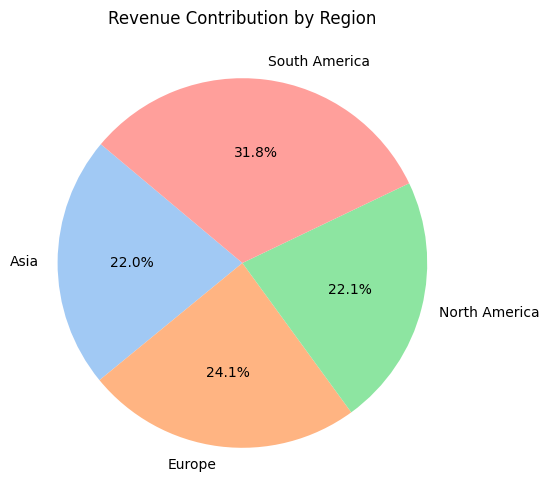

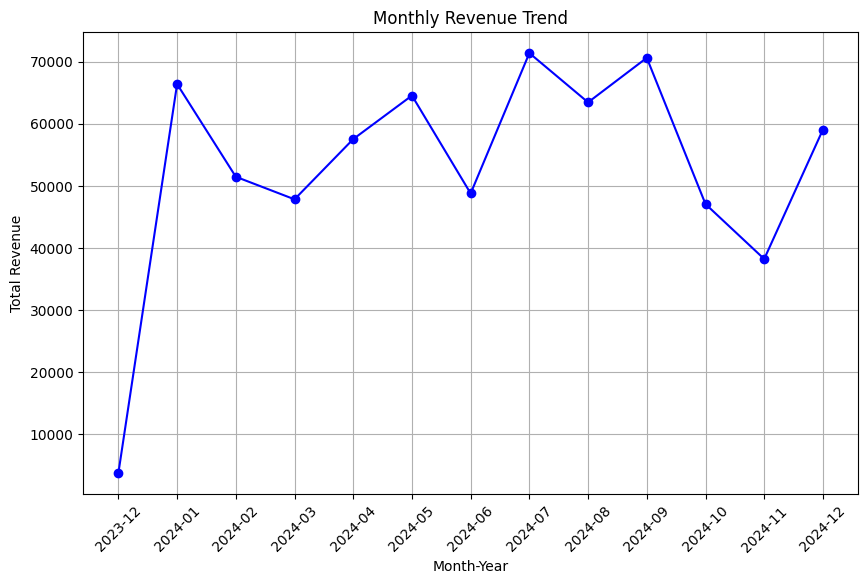

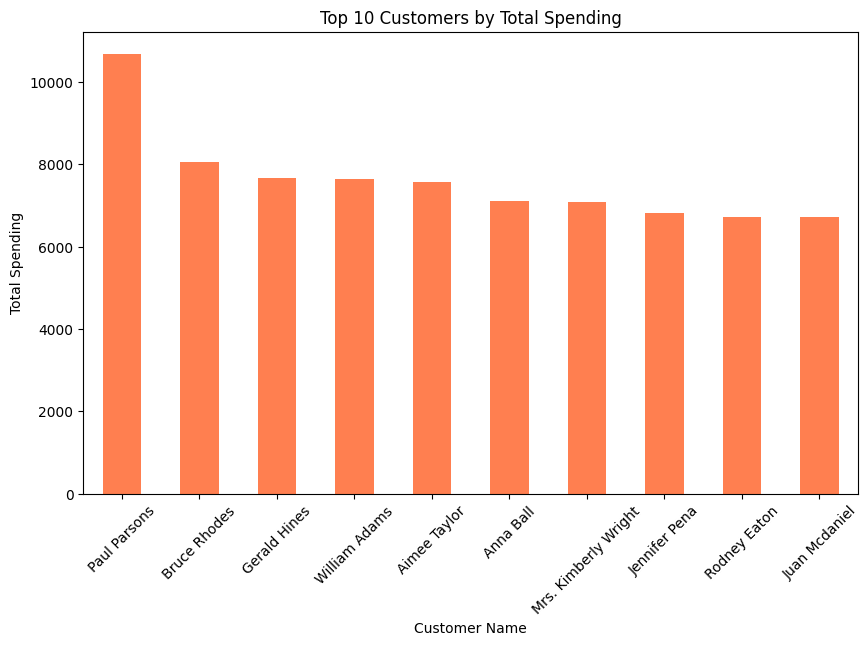

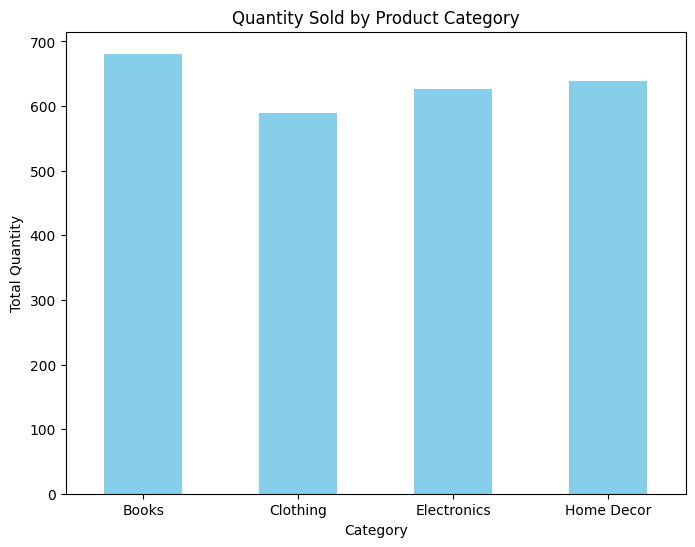

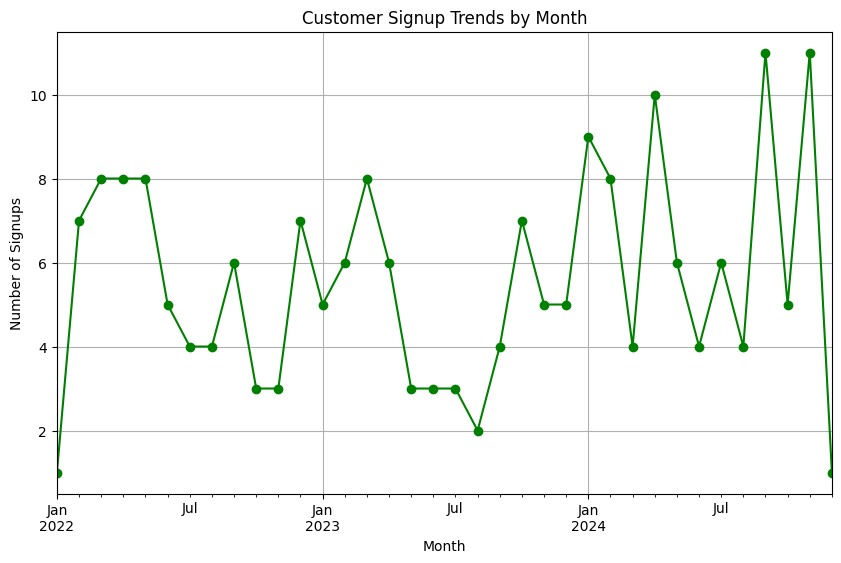

In [7]:
# Plot: Revenue contribution by region
plt.figure(figsize=(8, 6))
region_revenue.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Revenue Contribution by Region')
plt.ylabel('')
plt.show()

# Plot: Monthly revenue trend
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue['MonthYear'], monthly_revenue['TotalValue'], marker='o', color='b')
plt.xticks(rotation=45)
plt.title('Monthly Revenue Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

# Plot: Top 10 customers by spending
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='coral')
plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Customer Name')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.show()

# Plot: Product category breakdown by quantity
plt.figure(figsize=(8, 6))
category_quantity.plot(kind='bar', color='skyblue')
plt.title('Quantity Sold by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Quantity')
plt.xticks(rotation=0)
plt.show()

# Plot: Signup trends by month
plt.figure(figsize=(10, 6))
signup_monthly.plot(marker='o', linestyle='-', color='green')
plt.title('Customer Signup Trends by Month')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.grid(True)
plt.show()
